In [1]:
from data_utils import *
from helpers import *
from sketchrnn import *
from sketch_transfer import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
hp = HParams()
hp.wKL = 0.5
hp.KL_a = 0.01
hp.KL_start = 0.1
hp.KL_delta = 0.002
hp.KL_min = 0.0
hp.lr = 0.001
hp.lr_decay = 0.999
dataset = SmoothCurve("data/threecurves.csv")
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=0)
model = SketchTransfer(hp)

Loaded 1715 segments of style 0
Shape: (1715, 4, 100)
Loaded 912 segments of style 1
Shape: (912, 4, 100)
Loaded 1469 segments of style 2
Shape: (1469, 4, 100)


In [26]:
hp = HParams()
hp.wKL = 0.001
hp.KL_a = 10.0
hp.KL_start = 0.1
hp.KL_delta = 0.005
hp.KL_min = 0.0
hp.lr = 0.001
hp.lr_decay = 0.999
dataset = SmoothCurve("data/threecurves.csv")
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=0)
model = SketchTransfer(hp)

Loaded 1715 segments of style 0
Shape: (1715, 4, 100)
Loaded 912 segments of style 1
Shape: (912, 4, 100)
Loaded 1469 segments of style 2
Shape: (1469, 4, 100)


In [27]:
for i in range(500):
    model.train(dataloader, i)

Epoch 0 Loss KLcontrol 0.0005321787903085351 KLstroke 0.0005287693929858506 Loss R 3.5774004459381104
Epoch 1 Loss KLcontrol 0.00048752446309663355 KLstroke 0.0007180943503044546 Loss R 2.727308988571167
Epoch 2 Loss KLcontrol 0.0005005583516322076 KLstroke 0.0007717472035437822 Loss R 2.8550963401794434
Epoch 3 Loss KLcontrol 0.0005606822669506073 KLstroke 0.0003511133254505694 Loss R 2.792383909225464
Epoch 4 Loss KLcontrol 0.0004648622707463801 KLstroke 0.0004429091641213745 Loss R 2.205540418624878
Epoch 5 Loss KLcontrol 0.0005161879234947264 KLstroke 0.0006417647819034755 Loss R 2.2030293941497803
Epoch 6 Loss KLcontrol 0.0002885600260924548 KLstroke 0.00026922166580334306 Loss R 2.2543184757232666
Epoch 7 Loss KLcontrol 0.00013115802721586078 KLstroke 0.00017996221140492707 Loss R 2.179816246032715
Epoch 8 Loss KLcontrol 0.00014288640522863716 KLstroke 0.0002271732228109613 Loss R 2.1403403282165527
Epoch 9 Loss KLcontrol 0.0001727221388136968 KLstroke 0.00024559820303693414 Loss

Epoch 81 Loss KLcontrol 0.0011207842035219073 KLstroke 0.08990023285150528 Loss R 1.5070698261260986
Epoch 82 Loss KLcontrol 0.0011854262556880713 KLstroke 0.09210705757141113 Loss R 2.152193546295166
Epoch 83 Loss KLcontrol 0.0011468568118289113 KLstroke 0.10306335985660553 Loss R 0.7851952910423279
Epoch 84 Loss KLcontrol 0.0011214041151106358 KLstroke 0.09354912489652634 Loss R 0.9836990237236023
Epoch 85 Loss KLcontrol 0.0011534332297742367 KLstroke 0.0878475159406662 Loss R 1.205848217010498
Epoch 86 Loss KLcontrol 0.0011912258341908455 KLstroke 0.09828003495931625 Loss R 1.1868411302566528
Epoch 87 Loss KLcontrol 0.0011586984619498253 KLstroke 0.09175917506217957 Loss R 0.5949361324310303
Epoch 88 Loss KLcontrol 0.0012374735670164227 KLstroke 0.10982135683298111 Loss R 1.1817412376403809
Epoch 89 Loss KLcontrol 0.001350386650301516 KLstroke 0.115179143846035 Loss R 1.0045075416564941
Epoch 90 Loss KLcontrol 0.0013294360833242536 KLstroke 0.11938267946243286 Loss R 1.1772572994232

Epoch 162 Loss KLcontrol 0.0018328104633837938 KLstroke 0.10893049836158752 Loss R 0.7779682874679565
Epoch 163 Loss KLcontrol 0.001965995179489255 KLstroke 0.13314566016197205 Loss R 1.8647202253341675
Epoch 164 Loss KLcontrol 0.0019157914211973548 KLstroke 0.13745635747909546 Loss R 0.9535842537879944
Epoch 165 Loss KLcontrol 0.0019176345085725188 KLstroke 0.1395009160041809 Loss R -0.000878615363035351
Epoch 166 Loss KLcontrol 0.0019535617902874947 KLstroke 0.14064966142177582 Loss R 0.9978373646736145
Epoch 167 Loss KLcontrol 0.0020164730958640575 KLstroke 0.1346837729215622 Loss R 0.3875148594379425
Epoch 168 Loss KLcontrol 0.002048834227025509 KLstroke 0.1263417899608612 Loss R 0.5333036184310913
Epoch 169 Loss KLcontrol 0.002063410822302103 KLstroke 0.15361841022968292 Loss R 0.8585624694824219
Epoch 170 Loss KLcontrol 0.0018865454476326704 KLstroke 0.1319066435098648 Loss R 0.5777100324630737
Epoch 171 Loss KLcontrol 0.002131690038368106 KLstroke 0.127889022231102 Loss R 0.5135

Epoch 243 Loss KLcontrol 0.002227864461019635 KLstroke 0.09770536422729492 Loss R -0.098959781229496
Epoch 244 Loss KLcontrol 0.0021634583827108145 KLstroke 0.08637357503175735 Loss R 0.1216999962925911
Epoch 245 Loss KLcontrol 0.0022056661546230316 KLstroke 0.09394162148237228 Loss R 0.27765926718711853
Epoch 246 Loss KLcontrol 0.0021245323587208986 KLstroke 0.09769706428050995 Loss R 0.8536720871925354
Epoch 247 Loss KLcontrol 0.002146452432498336 KLstroke 0.09379718452692032 Loss R 0.3219519853591919
Epoch 248 Loss KLcontrol 0.002151889493688941 KLstroke 0.10038537532091141 Loss R 0.07806673645973206
Epoch 249 Loss KLcontrol 0.00197487766854465 KLstroke 0.09898105263710022 Loss R 1.7237282991409302
Epoch 250 Loss KLcontrol 0.0021982809994369745 KLstroke 0.11180198937654495 Loss R -0.13696901500225067
Epoch 251 Loss KLcontrol 0.002140094991773367 KLstroke 0.08106362074613571 Loss R 0.1489437222480774
Epoch 252 Loss KLcontrol 0.002152689965441823 KLstroke 0.0810975730419159 Loss R -0.

Epoch 324 Loss KLcontrol 0.0023846584372222424 KLstroke 0.06047412380576134 Loss R -0.7293159365653992
Epoch 325 Loss KLcontrol 0.002289334312081337 KLstroke 0.07641535997390747 Loss R 1.0717852115631104
Epoch 326 Loss KLcontrol 0.002528443466871977 KLstroke 0.07334528118371964 Loss R 0.8414309620857239
Epoch 327 Loss KLcontrol 0.0024264452513307333 KLstroke 0.0646996721625328 Loss R 0.39209747314453125
Epoch 328 Loss KLcontrol 0.0023751426488161087 KLstroke 0.06723696738481522 Loss R 0.31128060817718506
Epoch 329 Loss KLcontrol 0.0024456765968352556 KLstroke 0.0627894476056099 Loss R -0.4184844195842743
Epoch 330 Loss KLcontrol 0.002524831797927618 KLstroke 0.0698578804731369 Loss R 0.07043318450450897
Epoch 331 Loss KLcontrol 0.0025048227980732918 KLstroke 0.07541239261627197 Loss R 0.4472600817680359
Epoch 332 Loss KLcontrol 0.0024744851980358362 KLstroke 0.07365527004003525 Loss R -0.044660534709692
Epoch 333 Loss KLcontrol 0.002379706595093012 KLstroke 0.077357716858387 Loss R 0.7

Epoch 404 Loss KLcontrol 0.0027230456471443176 KLstroke 0.038195572793483734 Loss R -0.4307977855205536
Epoch 405 Loss KLcontrol 0.002641908125951886 KLstroke 0.04172471910715103 Loss R 0.4575837552547455
Epoch 406 Loss KLcontrol 0.0026438806671649218 KLstroke 0.0427960604429245 Loss R -0.6129310727119446
Epoch 407 Loss KLcontrol 0.00262152380309999 KLstroke 0.039532341063022614 Loss R -0.8135881423950195
Epoch 408 Loss KLcontrol 0.002890483010560274 KLstroke 0.04777773842215538 Loss R -0.08720766007900238
Epoch 409 Loss KLcontrol 0.0027514940593391657 KLstroke 0.04452162981033325 Loss R -0.2312866896390915
Epoch 410 Loss KLcontrol 0.0028058334719389677 KLstroke 0.046619683504104614 Loss R -0.16453586518764496
Epoch 411 Loss KLcontrol 0.002645460655912757 KLstroke 0.04085204750299454 Loss R -0.014648675918579102
Epoch 412 Loss KLcontrol 0.0025992626324295998 KLstroke 0.0439167357981205 Loss R 0.26320919394493103
Epoch 413 Loss KLcontrol 0.002510359510779381 KLstroke 0.04028609022498131

Epoch 484 Loss KLcontrol 0.0029190995264798403 KLstroke 0.026612328365445137 Loss R -0.14900857210159302
Epoch 485 Loss KLcontrol 0.0028003426268696785 KLstroke 0.0303849708288908 Loss R 0.2500421106815338
Epoch 486 Loss KLcontrol 0.002903030486777425 KLstroke 0.02718384750187397 Loss R 0.16015681624412537
Epoch 487 Loss KLcontrol 0.0029513027984648943 KLstroke 0.02652783691883087 Loss R -0.24139876663684845
Epoch 488 Loss KLcontrol 0.0029056950006633997 KLstroke 0.026526957750320435 Loss R -0.37061843276023865
Epoch 489 Loss KLcontrol 0.0028841125313192606 KLstroke 0.02553928829729557 Loss R -0.7673267722129822
Epoch 490 Loss KLcontrol 0.0027519776485860348 KLstroke 0.02450150065124035 Loss R -0.23459772765636444
Epoch 491 Loss KLcontrol 0.0027414883952587843 KLstroke 0.02548772096633911 Loss R -0.6311500668525696
Epoch 492 Loss KLcontrol 0.0028126174584031105 KLstroke 0.02649880014359951 Loss R -0.4643656313419342
Epoch 493 Loss KLcontrol 0.0029164350125938654 KLstroke 0.025788228958

Encoded style:  [0. 0. 1.]


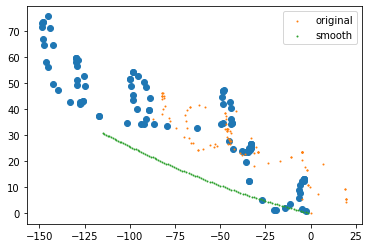

In [31]:
model.hp.temperature = 0.8
idx = 4000
data, style = dataset[idx]
inputs = torch.FloatTensor(data).cuda().unsqueeze(0).permute(2, 0, 1)
labels = torch.FloatTensor(style).cuda().unsqueeze(0)
xs, ys, dx, dy = model.test_reconstruction(inputs, labels)
plt.scatter(xs, ys)
#controlx = np.cumsum(controldx)
#controly = np.cumsum(controldy)
#plt.plot(controlx, controly)
dataset.visualize(idx)
#plt.plot(dx)
#plt.plot(dy)
#dataset.visualize_d(idx)

In [22]:
def scatter_latent_control(dataset, style, color):
    x1 = []
    x2 = []
    for i in range(len(dataset)):
        data, labels = dataset[i]
        if labels[style] < 0.5:
            continue
        inputs = torch.FloatTensor(data[2:, :]).cuda().unsqueeze(0).permute(2, 0, 1)
        labels = torch.FloatTensor(labels).cuda().unsqueeze(0)

        model.encoder_control.train(False)
        z, mu, sigma_hat = model.encoder_control(inputs)
        z = z.squeeze().detach().cpu().numpy()
        x1.append(z[0])
        x2.append(z[1])
    plt.scatter(x1, x2, s=1, c=color)
    
def scatter_latent_control_test(dataset, style, color):
    x1 = []
    x2 = []
    for i in range(len(dataset)):
        data, labels = dataset[i]
        if labels[style] < 0.5:
            continue
        if data[2, 0] < 0:
            data[2, :] *= -1.0
        if data[3, 0] < 0:
            data[3, :] *= -1.0
        inputs = torch.FloatTensor(data[2:, :]).cuda().unsqueeze(0).permute(2, 0, 1)
        labels = torch.FloatTensor(labels).cuda().unsqueeze(0)

        model.encoder_control.train(False)
        z, mu, sigma_hat = model.encoder_control(inputs)
        z = z.squeeze().detach().cpu().numpy()
        x1.append(z[0])
        x2.append(z[1])
    plt.scatter(x1, x2, s=1, c=color)
    
def scatter_latent_stroke(dataset, style, color):
    x1 = []
    x2 = []
    for i in range(len(dataset)):
        data, labels = dataset[i]
        if labels[style] < 0.5:
            continue
        inputs = torch.FloatTensor(data[:2, :]).cuda().unsqueeze(0).permute(2, 0, 1)
        labels = torch.FloatTensor(labels).cuda().unsqueeze(0)

        model.encoder_stroke.train(False)
        z, mu, sigma_hat = model.encoder_stroke(inputs, labels)
        z = z.squeeze().detach().cpu().numpy()
        x1.append(z[0])
        x2.append(z[1])
    plt.scatter(x1, x2, s=1, c=color)

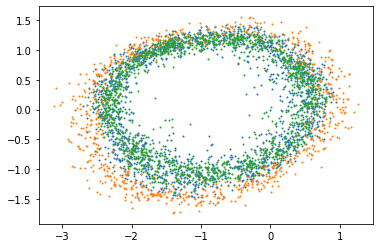

In [32]:
scatter_latent_control(dataset, 0, '#1f77b4')
scatter_latent_control(dataset, 1, '#ff7f0e')
scatter_latent_control(dataset, 2, '#2ca02c')

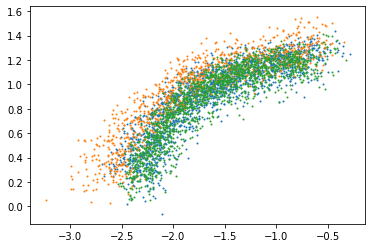

In [33]:
scatter_latent_control_test(dataset, 0, '#1f77b4')
scatter_latent_control_test(dataset, 1, '#ff7f0e')
scatter_latent_control_test(dataset, 2, '#2ca02c')

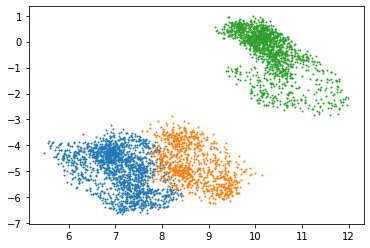

In [34]:
scatter_latent_stroke(dataset, 0, '#1f77b4')
scatter_latent_stroke(dataset, 1, '#ff7f0e')
scatter_latent_stroke(dataset, 2, '#2ca02c')

In [28]:
dataset = SmoothCurve("data/threecurves.csv")
hp.dropout = 0.1
hp.Nz = 2
hp.M = 5
hp.wKL = 1.0
hp.KL_delta = 0.01
hp.KL_start = 0.002
hp.enc_hidden_size = 128  # 256
hp.dec_hidden_size = 256
hp.KL_min = 0.0
hp.lr = 0.001
hp.lr_decay = 0.995
model1 = SketchRNN_Control()
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0)

Loaded 1715 segments of style 0
Shape: (1715, 4, 100)
Loaded 912 segments of style 1
Shape: (912, 4, 100)
Loaded 1469 segments of style 2
Shape: (1469, 4, 100)


In [29]:
for i in range(300):
    model1.train(dataloader, i)

Epoch 0 Loss KL 0.0004914580495096743 Loss R 2.8278825283050537
Epoch 1 Loss KL 0.0017741038464009762 Loss R 2.771678924560547
Epoch 2 Loss KL 0.002819728571921587 Loss R 4.011075496673584
Epoch 3 Loss KL 0.0034590004943311214 Loss R 2.829315423965454
Epoch 4 Loss KL 0.0026973364874720573 Loss R 2.2423183917999268
Epoch 5 Loss KL 0.002733261091634631 Loss R 2.238746404647827
Epoch 6 Loss KL 0.001948842778801918 Loss R 1.8534018993377686
Epoch 7 Loss KL 0.0019082757644355297 Loss R 1.7830873727798462
Epoch 8 Loss KL 0.001640808186493814 Loss R 2.153676748275757
Epoch 9 Loss KL 0.0011713182320818305 Loss R 2.0972304344177246
Epoch 10 Loss KL 0.0009250083821825683 Loss R 1.5430501699447632
Epoch 11 Loss KL 0.0008215029374696314 Loss R 1.944246768951416
Epoch 12 Loss KL 0.0007916177855804563 Loss R 1.4829119443893433
Epoch 13 Loss KL 0.0009320516255684197 Loss R 1.5233210325241089
Epoch 14 Loss KL 0.0009330905741080642 Loss R 2.3555800914764404
Epoch 15 Loss KL 0.001011245185509324 Loss R 

Epoch 125 Loss KL 0.00016863402561284602 Loss R 0.5583130717277527
Epoch 126 Loss KL 8.657018770463765e-05 Loss R -0.05963055416941643
Epoch 127 Loss KL 1.801280814106576e-05 Loss R 0.5015119910240173
Epoch 128 Loss KL 5.6406377552775666e-05 Loss R -0.216191828250885
Epoch 129 Loss KL 4.858721877099015e-05 Loss R -0.13976417481899261
Epoch 130 Loss KL 2.648193003551569e-05 Loss R -0.765958309173584
Epoch 131 Loss KL 3.052821921301074e-05 Loss R -0.2281561642885208
Epoch 132 Loss KL 7.41051699151285e-05 Loss R -0.3947785198688507
Epoch 133 Loss KL 4.266009636921808e-05 Loss R -0.36065980792045593
Epoch 134 Loss KL 5.7042812841245905e-05 Loss R 0.6889607310295105
Epoch 135 Loss KL 8.222901669796556e-05 Loss R -0.02942550554871559
Epoch 136 Loss KL 0.0005984460585750639 Loss R -0.25989803671836853
Epoch 137 Loss KL 8.573405648348853e-05 Loss R -0.1500803679227829
Epoch 138 Loss KL 3.8431833672802895e-05 Loss R 0.07915317267179489
Epoch 139 Loss KL 6.72098612994887e-05 Loss R 0.03345930203

Epoch 248 Loss KL 0.00020909600425511599 Loss R -1.043042540550232
Epoch 249 Loss KL 0.0001346740173175931 Loss R -0.8533656597137451
Epoch 250 Loss KL 6.768065941287205e-05 Loss R -0.46746528148651123
Epoch 251 Loss KL 5.5377076932927594e-05 Loss R -1.0788633823394775
Epoch 252 Loss KL 8.285658259410411e-05 Loss R -1.3281631469726562
Epoch 253 Loss KL 7.21809410606511e-05 Loss R -1.2423789501190186
Epoch 254 Loss KL 0.00011938611714867875 Loss R -1.0697944164276123
Epoch 255 Loss KL 8.316593448398635e-05 Loss R -0.014668092131614685
Epoch 256 Loss KL 9.459838474867865e-05 Loss R -1.484440565109253
Epoch 257 Loss KL 9.266949200537056e-05 Loss R -0.6517820358276367
Epoch 258 Loss KL 0.00010156554344575852 Loss R -0.7140238285064697
Epoch 259 Loss KL 6.041161032044329e-05 Loss R -1.3385655879974365
Epoch 260 Loss KL 6.181605567689985e-05 Loss R -0.33838748931884766
Epoch 261 Loss KL 4.730175714939833e-05 Loss R -1.6707558631896973
Epoch 262 Loss KL 9.194253652822226e-05 Loss R 0.02599468

In [15]:
hp.lr = 0.0004
for i in range(200, 300):
    model1.train(dataloader, i)

Epoch 200 Loss KL 0.018958644941449165 Loss R -0.060988690704107285
Epoch 201 Loss KL 0.017385175451636314 Loss R -0.2815326452255249
Epoch 202 Loss KL 0.017695248126983643 Loss R 0.1404048502445221
Epoch 203 Loss KL 0.01865800842642784 Loss R -0.27371522784233093
Epoch 204 Loss KL 0.017834918573498726 Loss R -0.5067554116249084
Epoch 205 Loss KL 0.018625054508447647 Loss R 0.6697233319282532
Epoch 206 Loss KL 0.018122894689440727 Loss R -0.39584487676620483
Epoch 207 Loss KL 0.016362598165869713 Loss R 0.7601092457771301
Epoch 208 Loss KL 0.01790909469127655 Loss R 2.067540168762207
Epoch 209 Loss KL 0.018291831016540527 Loss R 0.3657526671886444
Epoch 210 Loss KL 0.018448511138558388 Loss R -0.06284880638122559
Epoch 211 Loss KL 0.017836833372712135 Loss R 0.41857248544692993
Epoch 212 Loss KL 0.01910092495381832 Loss R -0.013639602810144424
Epoch 213 Loss KL 0.0186189953237772 Loss R -0.17961335182189941
Epoch 214 Loss KL 0.017593063414096832 Loss R 0.2859055697917938
Epoch 215 Loss

In [4]:
# trained for 300 epoches
#hp.dropout = 0.1
#hp.Nz = 2
#hp.M = 5
#hp.wKL = 1.0
#hp.KL_start = 0.01  KL remains constant
#hp.KL_min = 0.0
#hp.lr = 0.001

saved_encoder = torch.load("encoderRNN_sel_0.014624_epoch_280.pth")
saved_decoder = torch.load("decoderRNN_sel_0.014624_epoch_280.pth")
model1.encoder.load_state_dict(saved_encoder)
model1.decoder.load_state_dict(saved_decoder)

<All keys matched successfully>

Encoded style:  [1. 0. 0.]


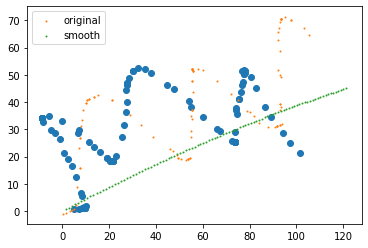

In [33]:
hp.temperature = 0.8
hp.M = 5
idx = 1000
data, style = dataset[idx]
controldx = data[2, :].copy()
controldy = data[3, :].copy()
inputs = torch.FloatTensor(data[2:, :]).cuda().unsqueeze(0).permute(2, 0, 1)
labels = torch.FloatTensor(style).cuda().unsqueeze(0)
xs, ys, dx, dy = model1.conditional_generation(inputs, labels)
plt.scatter(xs, ys)
#controlx = np.cumsum(controldx)
#controly = np.cumsum(controldy)
#plt.plot(controlx, controly)
dataset.visualize(idx)
#plt.plot(dx)
#plt.plot(dy)
#dataset.visualize_d(idx)

In [17]:
def scatter_latent(dataset, style, color):
    x1 = []
    x2 = []
    for i in range(len(dataset)):
        data, labels = dataset[i]
        if labels[style] < 0.5:
            continue
        inputs = torch.FloatTensor(data[2:, :]).cuda().unsqueeze(0).permute(2, 0, 1)
        labels = torch.FloatTensor(labels).cuda().unsqueeze(0)

        model1.encoder.train(False)
        z, mu, sigma_hat = model1.encoder(inputs, labels)
        z = z.squeeze().detach().cpu().numpy()
        x1.append(z[0])
        x2.append(z[1])
    plt.scatter(x1, x2, s=1, c=color)

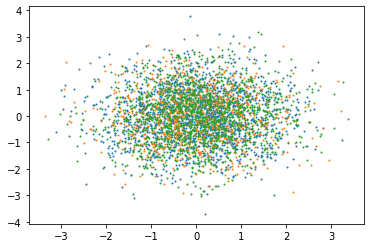

In [34]:
scatter_latent(dataset, 0, '#1f77b4')
scatter_latent(dataset, 1, '#ff7f0e')
scatter_latent(dataset, 2, '#2ca02c')

In [19]:
def scatter_latent_test(dataset, style, color):
    x1 = []
    x2 = []
    for i in range(len(dataset)):
        data, labels = dataset[i]
        if labels[style] < 0.5:
            continue
        if data[2, 0] < 0:
            data[2, :] *= -1.0
        if data[3, 0] < 0:
            data[3, :] *= -1.0
        inputs = torch.FloatTensor(data[2:, :]).cuda().unsqueeze(0).permute(2, 0, 1)
        labels = torch.FloatTensor(labels).cuda().unsqueeze(0)

        model1.encoder.train(False)
        z, mu, sigma_hat = model1.encoder(inputs, labels)
        z = z.squeeze().detach().cpu().numpy()
        x1.append(z[0])
        x2.append(z[1])
    plt.scatter(x1, x2, s=1, c=color)

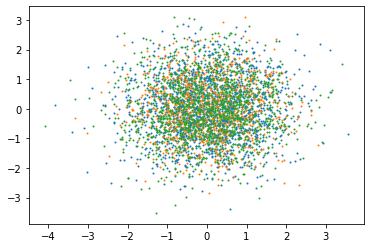

In [35]:
scatter_latent_test(dataset, 0, '#1f77b4')
scatter_latent_test(dataset, 1, '#ff7f0e')
scatter_latent_test(dataset, 2, '#2ca02c')